# Angelo Mariano

In [28]:
#imports all libraries 
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", message="Glyph.*missing from font")

try:
    import seaborn as sns
    sns.set(style="whitegrid")
except ImportError:
    pass


In [32]:
#Opens the Arrests dataset
file_path_arrests = "pbp_arrests_2024_jan1_thru_oct31_2025.csv"

try:
    df_arrests = pd.read_csv(file_path_arrests, encoding="ISO-8859-1")
except FileNotFoundError:
    print("Not found")


In [33]:
# Checks all of the columns
print(df_arrests.columns.tolist())

# Detect possible columns
date_col_candidates = [col for col in df_arrests.columns if 'date' in col.lower()]
neighborhood_col_candidates = [col for col in df_arrests.columns if 'neighborhood' in col.lower()]

print("Possible date columns:", date_col_candidates)
print("Possible neighborhood columns:", neighborhood_col_candidates)

# Choose first candidate automatically
date_col = date_col_candidates[0]       # e.g., "ArrestDate"
neighborhood_col = neighborhood_col_candidates[0]  # e.g., "Neighborhood"


['Template', 'Case_Number', 'ArrestPerson_ID', 'Arrest_Date', 'Arrest_Year', 'Arrest_Month', 'Arrest_Time', 'Type', 'ArrestPerson_Age', 'ArrestPerson_Sex', 'ArrestPerson_Race', 'NIBRS_Coded_Offense', 'NIBRS_Offense_Code', 'NIBRS_Offense_Category', 'NIBRS_Offense_Type', 'NIBRS_Crime_Against', 'NIBRS_Offense_Grouping', 'Violation', 'Zone', 'Tract', 'Neighborhood', 'ArrestCharge_Felony_Misdemeanor_Description', 'XCOORD', 'YCOORD', 'Block_Address']
Possible date columns: ['Arrest_Date']
Possible neighborhood columns: ['Neighborhood']


In [34]:
#Cleans all of the data and gets rid of what does not fit or work 
df_arrests = df_arrests.dropna(subset=[date_col, neighborhood_col])

#Change date column to datetime
df_arrests[date_col] = pd.to_datetime(df_arrests[date_col], errors="coerce")
df_arrests = df_arrests.dropna(subset=[date_col])


In [35]:
#Counts all the arrests by neighborhood
arrest_counts = df_arrests[neighborhood_col].value_counts().reset_index()
arrest_counts.columns = [neighborhood_col, "ArrestCount"]


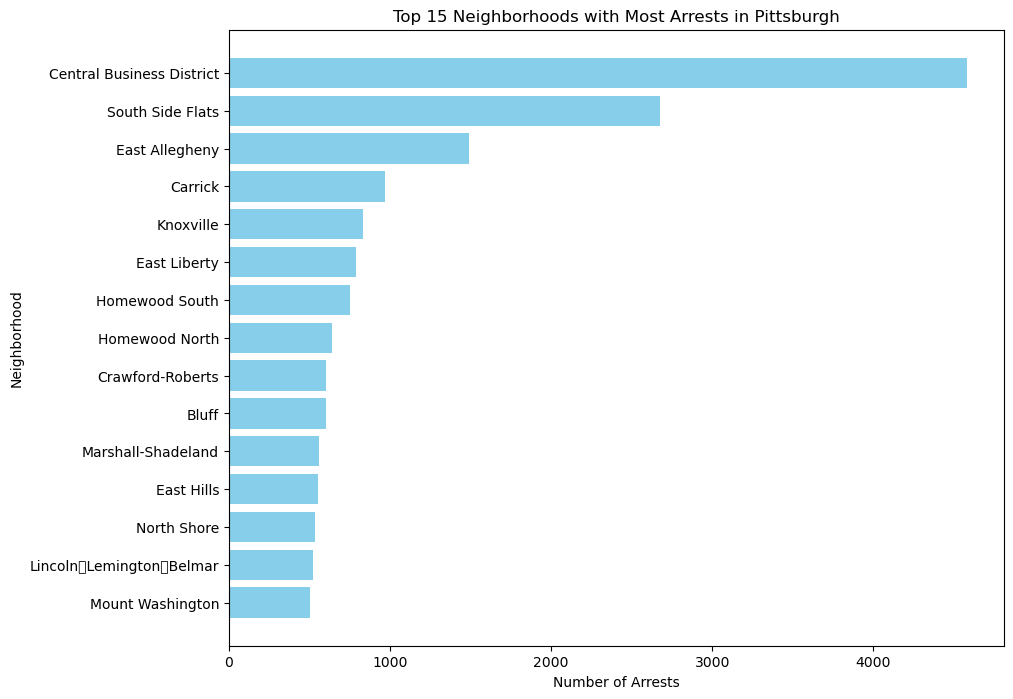

In [36]:
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,8))
    sns.barplot(data=arrest_counts.head(15), 
                x='ArrestCount', 
                y=neighborhood_col, 
                palette='coolwarm')
    plt.title('Top 15 Neighborhoods with Most Arrests in Pittsburgh')
    plt.xlabel('Number of Arrests')
    plt.ylabel('Neighborhood')
    plt.gca().invert_yaxis()
    plt.show()
except ImportError:
    plt.figure(figsize=(10,8))
    plt.barh(arrest_counts.head(15)[neighborhood_col], 
             arrest_counts.head(15)['ArrestCount'], 
             color='skyblue')
    plt.xlabel('Number of Arrests')
    plt.ylabel('Neighborhood')
    plt.title('Top 15 Neighborhoods with Most Arrests in Pittsburgh')
    plt.gca().invert_yaxis()
    plt.show()


**Conclusion**


Based on the information I looked at, Mount Washington appears to have the best safety in Pittsburgh. Some people could say otherwise based on information outside of just arrests, but the statistics here support it fairly well. This analysis provides a clear, easy-to-read bar graph showing the neighborhoods with the most to least arrests in Pittsburgh. Overall this gives a 